# Exploratory Data Analysis & Data Cleaning

**Imports**

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Will need seaborn for visualizations and will need SciKit learn for modeling & metrics
import seaborn as sns

**Read-in the training data**

In [359]:
train = pd.read_csv('./datasets/train.csv')

In [360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Initial observations:
- Total of 2,051 observations. 
- There are 80 total variables. 
- Most variables don't have null values
- Pool QC, Misc Feature, Fence, and Alley have significantly fewer variables
- Dataset contains both ID and PID, ID is the variable we need in the final dataset for identification

### Data Cleaning Goals:
1. Evaluate Variable Types: does the type make sense for each variable?
2. Examine variable value counts for categorical and ordinal variables
3. Drop Variables if they do not have values for enough observations
4. Examine variable 5 number summary for outlier values or typos for int & float variables

In [361]:
train['MS SubClass'].value_counts()
# This variable matches the documentation for the dataset
#This variable should be an object/ string this is a categorical variable

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

In [362]:
train['MS Zoning'].value_counts()
# The variable counts do not match the documentation for this dataset
# I (all) is not an expected value
# As expected, there are no RP or residential park

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [363]:
train[train['MS Zoning']== "I (all)"]
#Don't see anything else about this observation that could indicate what I stands for...

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
581,946,912251110,30,I (all),109.0,21780,Grvl,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,57625


In [364]:
train['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [365]:
train['Lot Frontage'].describe()
#missing values but variable checks out

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [366]:
train['Lot Area'].describe()
#No missing values, large range

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64

In [367]:
train['Street'].value_counts()
#Only 7 values are gravel... will this be a significant variable for analysis?

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [368]:
train['Alley'].value_counts()
#Mostly missing, only applicable for houses with alleys
# Can input NA for all missing

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [369]:
train['Lot Shape'].value_counts()
#What does lot shape mean? 
#This variable and value counts match the documentation

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [370]:
train['Land Contour'].value_counts()
#no missing values
#values correspond to documentation

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

In [371]:
train['Utilities'].value_counts()
#No missing values
#Only 2 observations that are not allpub

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [372]:
train['Lot Config'].value_counts()
#No missing values
#Values match documentation

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [373]:
train['Land Slope'].value_counts()
#No missing values & matches documentation
#Only a little variation in values

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [374]:
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [375]:
train['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [376]:
train['Condition 2'].value_counts()
#So few values non-Norm
#No missing values

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [377]:
train['Bldg Type'].value_counts()
#No missing values and values track with documentation

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [378]:
train['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [379]:
train['Overall Qual'].describe()
#data ranges are as expected
#this variable should be an object not float unless i want to treat my ordinal variables that way

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

In [380]:
train['Overall Cond'].describe()
#What type of variable do i need this to be?

count    2051.000000
mean        5.562165
std         1.104497
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall Cond, dtype: float64

In [381]:
train['Year Built'].describe()
#looks fine- no weird outliers
#Should year be treated as a categorical/ ordinal variable or as a float/ int?

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

In [382]:
train['Year Remod/Add'].value_counts()
#This variable equals year built if there was no remodel or addition
#This variable looks fine

1950    262
2006    139
2007    123
2005    100
2004     83
2000     69
2003     68
2002     59
2008     55
1998     51
1999     46
1996     42
1994     41
1995     38
2001     35
1993     33
1976     32
1970     31
1977     31
1978     30
1997     29
1968     28
1958     28
1975     26
1990     23
2009     23
1967     22
1956     22
1959     21
1972     21
1960     20
1980     20
1962     20
1992     19
1966     19
1963     19
1991     19
1965     18
1953     18
1971     18
1955     18
1961     17
1954     17
1964     17
1969     16
1979     16
1957     15
1989     14
1973     13
1984     12
1988     12
1987     12
1951     10
1974     10
1952      9
1985      9
1986      9
2010      8
1983      7
1981      6
1982      3
Name: Year Remod/Add, dtype: int64

In [383]:
train['Roof Style'].value_counts()
#No missing values, values match documentation

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

In [384]:
train['Roof Matl'].value_counts()
#No missing values
#Not a lot of variation in values

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

In [385]:
train['Exterior 1st'].value_counts()
# No missing values
# Values match documentation

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [386]:
train['Exterior 2nd'].value_counts()
#Good variety
#No missing variables

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [387]:
train['Mas Vnr Type'].value_counts()
#Missing about 25 values
#Can i use Mas Vnr area to input missing or do they have the same amount of missing?

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [388]:
train['Mas Vnr Area'].describe()
# Do the areas = 0 correspond with apartments with no outer walls/ none???
# Missing values

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

In [389]:
train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [390]:
train['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [391]:
train['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [392]:
train['Bsmt Qual'].value_counts()
#Some Missing Values
#Look at description- there should be NA- missing are probably the NAs

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [393]:
train['Bsmt Cond'].value_counts()
#Same number of missing values as the basement qual variable- also has no NA

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [394]:
train['Bsmt Exposure'].value_counts()
#3 more missing than other basement variables
# alos supposed to have NA values

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [395]:
train['BsmtFin Type 1'].value_counts()
#Missing values and supposed to have NA values

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [396]:
train['BsmtFin SF 1'].describe()
#Only missing 1 value, can use this variable to confirm the NA for other basement variable

count    2050.000000
mean      442.300488
std       461.204124
min         0.000000
25%         0.000000
50%       368.000000
75%       733.750000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64

In [397]:
train['BsmtFin Type 2'].value_counts()
# Some missing values, missing the NA

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [398]:
train['BsmtFin SF 2'].describe()
#Values are reasonable, can use this variable to confirm NA basement for other variables
# only 1 missing variable

count    2050.000000
mean       47.959024
std       165.000901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFin SF 2, dtype: float64

In [399]:
train['Bsmt Unf SF'].describe()
# only 1 missing variable

count    2050.000000
mean      567.728293
std       444.954786
min         0.000000
25%       220.000000
50%       474.500000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64

In [400]:
train['Total Bsmt SF'].describe()
#Missing 1 value

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [401]:
train['Heating'].value_counts()
#Most values as just GasA

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [402]:
train['Heating QC'].value_counts()
#No missing values

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [403]:
train['Central Air'].value_counts()
#No missing values

Y    1910
N     141
Name: Central Air, dtype: int64

In [404]:
train['Electrical'].value_counts()
#No missing values
#Little variation

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [405]:
train['1st Flr SF'].describe()
# No missing value
#Values probably make sense- 334 sqft is low

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64

In [406]:
train['2nd Flr SF'].describe()
#No missing values
#values of 0 make sense for houses with no second floow

count    2051.000000
mean      329.329108
std       425.671046
min         0.000000
25%         0.000000
50%         0.000000
75%       692.500000
max      1862.000000
Name: 2nd Flr SF, dtype: float64

In [407]:
train['Low Qual Fin SF'].describe()
# No missing values

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64

In [408]:
train['Gr Liv Area'].describe()
# Minimum for this variable matches the 1st floor sf min value
# No missing values

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64

In [409]:
train['Bsmt Full Bath'].value_counts()
#2 missing values
#Should this be ordinal/ categorical instead of numerical?

0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [410]:
train['Bsmt Half Bath'].value_counts()
#0 is by far the most common response, only 126 nonzeros

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [411]:
train['Full Bath'].value_counts()
# ordinal/ categorical instead of numerical?
# No missing values

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

In [412]:
train['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [413]:
train['Bedroom AbvGr'].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

In [414]:
train['Kitchen AbvGr'].value_counts()

1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

In [415]:
train['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [416]:
train['TotRms AbvGrd'].value_counts()

6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
14      1
2       1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64

In [417]:
train['Functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [418]:
train['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [419]:
train['Fireplace Qu'].value_counts()
#Only have 1051 values, supposed to be NA for missing

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [420]:
train['Garage Type'].value_counts()
#Missing values are probably NA

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [421]:
train['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [422]:
train['Garage Finish'].value_counts()
#Once again, all missings should be NA

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [423]:
train['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [424]:
train['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [425]:
train['Garage Qual'].value_counts()
#Few values are not TA
# Missings are NA

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [426]:
train['Garage Cond'].value_counts()
# Missings are NA

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [427]:
train['Paved Drive'].value_counts()
#Mostly yesses, no missing

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

In [428]:
train['Wood Deck SF'].describe()

count    2051.000000
mean       93.833740
std       128.549416
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood Deck SF, dtype: float64

In [429]:
train['Open Porch SF'].describe()

count    2051.000000
mean       47.556802
std        66.747241
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       547.000000
Name: Open Porch SF, dtype: float64

In [430]:
train['Enclosed Porch'].describe()

count    2051.000000
mean       22.571916
std        59.845110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       432.000000
Name: Enclosed Porch, dtype: float64

In [431]:
train['3Ssn Porch'].describe()

count    2051.000000
mean        2.591419
std        25.229615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64

In [432]:
train['Screen Porch'].describe()

count    2051.000000
mean       16.511458
std        57.374204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       490.000000
Name: Screen Porch, dtype: float64

In [433]:
train['Pool Area'].describe()

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

In [434]:
train['Pool QC'].value_counts()
#Only 9 values

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [435]:
train['Fence'].value_counts()
#Only 400 values
#Is it safe to assume the other values are NA??

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [436]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [437]:
train['Misc Val'].describe()

count     2051.000000
mean        51.574354
std        573.393985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: Misc Val, dtype: float64

In [438]:
train['Mo Sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64

In [439]:
train['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [440]:
train['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

In [441]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

## EDA Findings

Variables that should be dropped
- 'Utilities': only 2 values that are not "AllPub"- no predictive value
- 'Alley': Too many missing variables, no way to predict this variable or handle the missing values 
- 'Condition 2': only about 26 values that are non-Norm
- 'Roof Matl': Only 26 values that are varied
- 'Heating'
- 'Pool QC'
- 'Misc Feature'
- 


Variables that maybe should be dropped:
- Land Slope: Only ~100 out of 2000 observations that are not Gtl (But for the non Gtl, is this signficant?, especially severe slope?)
- Central Air: Only 141 Ns, but would that be significant?
- 'Electrical'
- 'Bsmt Half Bath'
- 'Low Qual Fin SF'
- 'Garage Yr Built' Collinearity with 'Year Built'?


Variables that may be could be combined?
- Porch SF variables?
- 

Type errors:
- MS SubClass
- Garage year built? Should this be a string or a float? If I treat it like a float I have to drop the missing values but if its a string then i lose same numeric functionality

Type decisions:
-Ordinal variables such as:
- OverallQual
- OverallCond

*I want to input 'NA' for all of the object/ string type variables (my categorical variables) with missing values, except for Mas Vnr Type which I have to look into further*

In [477]:
# Fix MS SubClass dtype

train['MS SubClass'] = train['MS SubClass'].astype(str).astype(str)
train['MS SubClass'].dtype

dtype('O')

In [476]:
train['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

In [443]:
# Create a list of string-type column names
string_columns = train.select_dtypes(include=['object']).columns

column_to_exclude = 'Mas Vnr Type'

# Use a for loop to input NA in each column in dataframe that is in list except Mas Vnr Type
for column in string_columns:
    if column != column_to_exclude:
        train[column].fillna('NA', inplace=True)

In [444]:
pd.set_option('display.max_rows', None)
train.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [445]:
# For missing values in Bsmt Full Bath & Half bath, i can first check to see if there is a basement

In [446]:
print(train['Bsmt Qual'][train['Bsmt Full Bath'].isna()])

616     NA
1327    NA
Name: Bsmt Qual, dtype: object


In [447]:
print(train['Bsmt Qual'][train['Bsmt Half Bath'].isna()])

616     NA
1327    NA
Name: Bsmt Qual, dtype: object


In [448]:
# I can input zeroes for the missing values in both variables since from the other basement categories I can see there is not bsmt
train['Bsmt Full Bath'].fillna(0, inplace=True)
train['Bsmt Half Bath'].fillna(0, inplace=True)

In [449]:
# Now I will run the same checks for other Bsmt categories: 
# Bsmt Fin SF1, Bsmt Fin SF2, Bsmt Unf SF, Total Bsmt SF.... could have used a listcomp since all column names contain Bsmt...
print(train['Bsmt Qual'][train['BsmtFin SF 1'].isna()])
print(train['Bsmt Qual'][train['BsmtFin SF 2'].isna()])
print(train['Bsmt Qual'][train['Bsmt Unf SF'].isna()])
print(train['Bsmt Qual'][train['Total Bsmt SF'].isna()])

1327    NA
Name: Bsmt Qual, dtype: object
1327    NA
Name: Bsmt Qual, dtype: object
1327    NA
Name: Bsmt Qual, dtype: object
1327    NA
Name: Bsmt Qual, dtype: object


In [450]:
train['BsmtFin SF 1'].fillna(0, inplace=True)
train['BsmtFin SF 2'].fillna(0, inplace=True)
train['Bsmt Unf SF'].fillna(0, inplace=True)
train['Total Bsmt SF'].fillna(0, inplace=True)

In [451]:
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

print(missing_values)

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    114
Garage Cars        1
Garage Area        1
dtype: int64


In [452]:
# Try the above steps for garage but using a loop on columns that contain 'Garage' in their name and 'Garage Type' to check for NA
# List of column names containing 'Garage'
#garage_columns = [col for col in train.columns if 'Garage' in col]

# Loop through the garage columns and fill missing values with 0 if 'Garage Type' == 0
#for col in garage_columns:
    #train.loc[train['Garage Type'] == 'NA', col] = 0
#Did this code fill any values in garage type with 0?

In [453]:
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

print(missing_values)

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    114
Garage Cars        1
Garage Area        1
dtype: int64


In [454]:
# Ok so that didn't work... are there actually no garages & i messed up the code
#or are the values missing for some other reason??
print(train['Garage Type'][train['Garage Cars'].isna()])

1712    Detchd
Name: Garage Type, dtype: object


In [455]:
print(train['Garage Type'][train['Garage Area'].isna()])

1712    Detchd
Name: Garage Type, dtype: object


In [456]:
print(train['Garage Type'][train['Garage Yr Blt'].isna()])

28          NA
53          NA
65          NA
79          NA
101         NA
103         NA
114         NA
120         NA
134         NA
136         NA
139         NA
162         NA
235         NA
256         NA
260         NA
264         NA
276         NA
334         NA
356         NA
382         NA
406         NA
409         NA
426         NA
437         NA
445         NA
457         NA
486         NA
530         NA
542         NA
555         NA
562         NA
579         NA
580         NA
612         NA
636         NA
653         NA
663         NA
689         NA
692         NA
700         NA
705         NA
708         NA
722         NA
736         NA
741         NA
783         NA
787         NA
791         NA
814         NA
822         NA
824         NA
858         NA
878         NA
901         NA
942         NA
943         NA
951         NA
959         NA
964         NA
970         NA
978         NA
1023        NA
1028        NA
1037        NA
1051        NA
1074        NA
1088      

So I can either keept Yr Built as a numeric variable and fill with np.nan temporarily but this will throw off my regression model. Or I can convert to a string and treat as a categorical variable with NA? If Garage Year built is highly correlated with Year Built then I can avoid the decision and drop Garage year built to also avoid collinearity

In [457]:
yr_corr = train['Garage Yr Blt'].corr(train['Year Built'])
yr_corr
# This is one of the strongest correlations in the entire dataframe

0.8253163760422901

In [458]:
#print(train['Lot Area'][train['Lot Frontage'].isna()])

*Lot Frontage is missing even though Lot Area > 0 ... how should i input the values of Lot Frontage? Lot Frontage and Lot Area don't seem to be collinear to the point i would consider dropping either - about .6. Also, both variables have decent coefficients with SalePrice, about .3*


*What if the missing values of Lot Frontage overlap with the observations with missing values for Mas Vnr Type? Then maybe I should just drop the missing values of Lot Frontage? I can try 2 models, 1 with missing values dropped and the other with mean?*

In [459]:
print(train['Lot Frontage'][train['Mas Vnr Type'].isna()])

22      103.0
41      107.0
86       67.0
212      90.0
276      75.0
338     112.0
431      75.0
451      87.0
591      35.0
844      30.0
913       NaN
939      95.0
1025     85.0
1244      NaN
1306      NaN
1430      NaN
1434     65.0
1606      NaN
1699     68.0
1815     49.0
1820     59.0
1941      NaN
Name: Lot Frontage, dtype: float64


In [460]:
# I don't end up with the overlap I was hoping for

In [461]:
#Perfect overlap for these variables
print(train['Mas Vnr Area'][train['Mas Vnr Type'].isna()])

22     NaN
41     NaN
86     NaN
212    NaN
276    NaN
338    NaN
431    NaN
451    NaN
591    NaN
844    NaN
913    NaN
939    NaN
1025   NaN
1244   NaN
1306   NaN
1430   NaN
1434   NaN
1606   NaN
1699   NaN
1815   NaN
1820   NaN
1941   NaN
Name: Mas Vnr Area, dtype: float64


### Data Visualization for EDA

In [462]:
numeric_columns = train.select_dtypes(include=['number'])

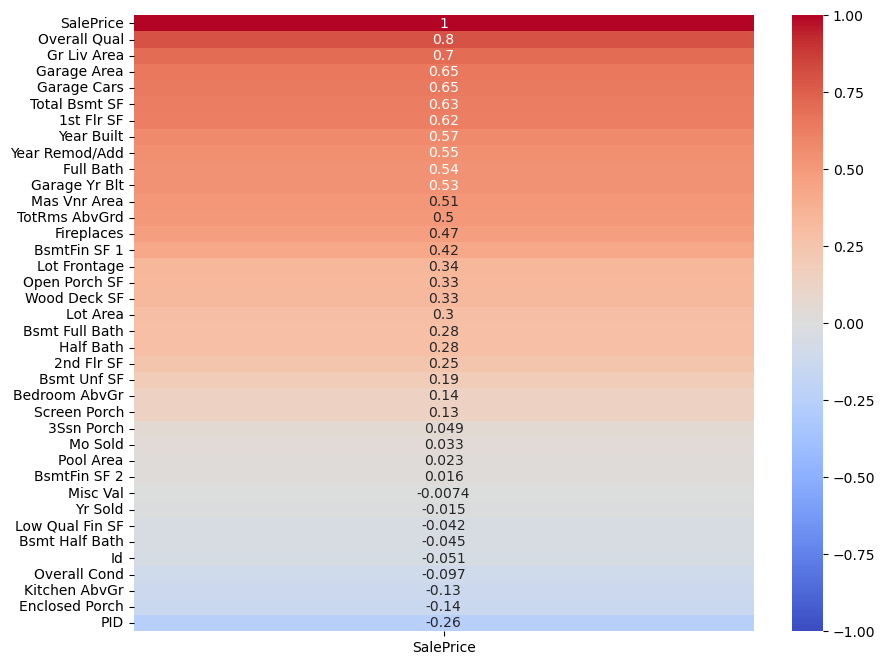

In [463]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True,
           vmin=-1,
           vmax=1,
           cmap = 'coolwarm');

In [464]:
# Is Total Bsmt SF collinear with BsmtFin SF 1 & BsmtFin SF 2? (and or the sum of both?)

### Data Cleaning Steps from EDA:

1. Drop columns that I identified as definite
2. Make 2 dataframes, 1 with more columns dropped, other with less
3. Fill missing values- NA for those I identified
4. Combine porch variables

In [465]:
#sns.pairplot(numeric_columns, n_jobs=4)

<Axes: >

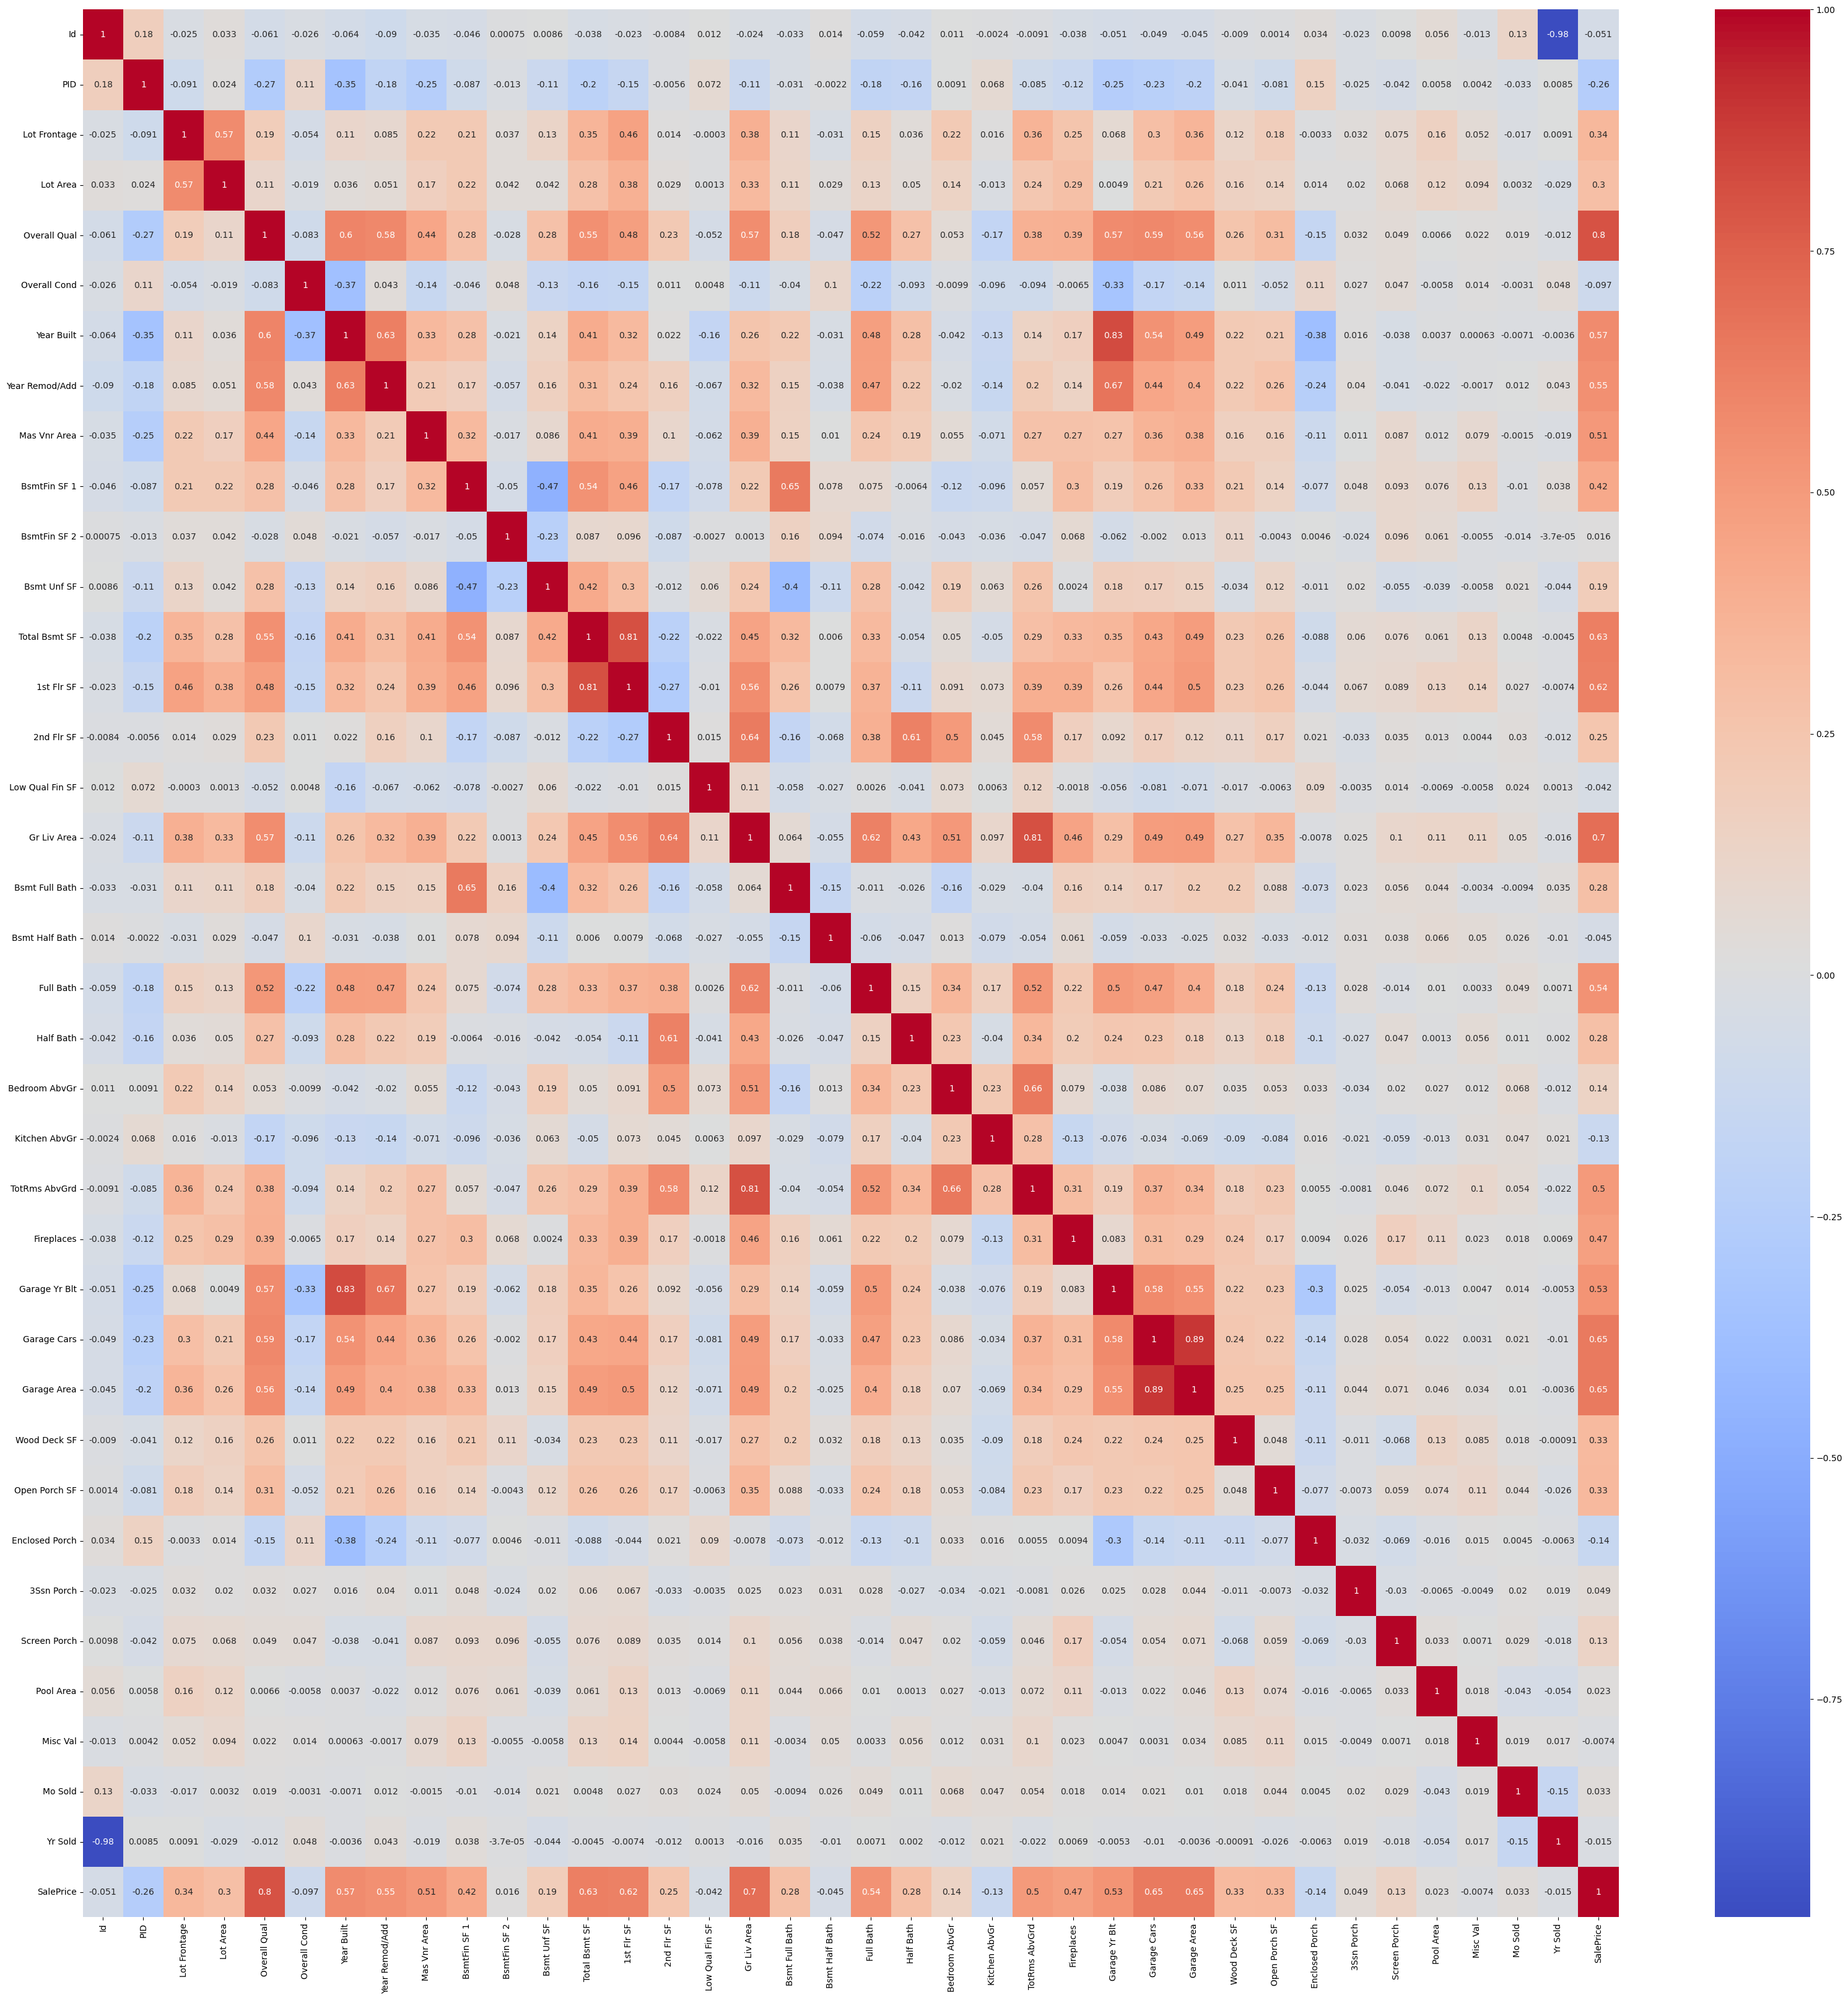

In [466]:
numeric_columns = train.select_dtypes(include=['number'])

# Create a correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (40,40))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

### Saving clean datasets

1. Create a simple 'clean' dataset with all missings dropped and with category 1 columns dropped
2. Create a simple 'clean' dataset with all missings dropped and with category 1 and 2 columns dropped
3. Create a simple 'clean' dataset with missings replaced with np.nan and with cat 1 columns dropped
4. Create a simple 'clean' dataset with missings replaced with np.nan and with cat 1 & 2 columns dropped


Category 1 columns:
- 'Utilities': only 2 values that are not "AllPub"- no predictive value
- 'Alley': Too many missing variables, no way to predict this variable or handle the missing values 
- 'Condition 2': only about 26 values that are non-Norm
- 'Roof Matl': Only 26 values that are varied
- 'Heating'
- 'Pool QC'
- 'Misc Feature'

Category 2 columns:
- Land Slope: Only ~100 out of 2000 observations that are not Gtl (But for the non Gtl, is this signficant?, especially severe slope?)
- Central Air: Only 141 Ns, but would that be significant?
- 'Electrical'
- 'Bsmt Half Bath'
- 'Low Qual Fin SF'
- 'Garage Yr Built' Collinearity with 'Year Built'?

In [467]:
cat_1 = ['Utilities', 'Alley', 'Condition 2', 'Roof Matl', 'Heating', 'Pool QC', 'Misc Feature']
cat_2 = ['Land Slope', 'Central Air', 'Electrical', 'Bsmt Half Bath', 'Low Qual Fin SF', 'Garage Yr Blt']

In [468]:
# Step 1
df1 = train.drop(columns = cat_1).dropna()

In [469]:
# Step 2
df2 = df1.drop(columns = cat_2)

In [470]:
# Step 3
df3 = train.drop(columns = cat_1).fillna(np.nan)

In [471]:
# Step 4
df4 = df3.drop(columns = cat_2)

In [472]:
df1.to_csv('datasets/df1.csv')

In [473]:
df2.to_csv('datasets/df2.csv')

In [474]:
df3.to_csv('datasets/df3.csv')

In [475]:
df4.to_csv('datasets/df4.csv')